# MNIST-Keras-NN

The following script executes a program for digit recognition on the mnist database using Keras Multi-layer Perceptron classifier

In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns


### Configurations
# Training-Size
num_train = 15000                   # 60000 for full data set 
num_test  = 2500                    # 10000 for full data set


# Use GridSearchCV to look up optimal parameters (see below)
hyper_parameter_search = False       # True/False: Run hyper-parameter search via GridSearchCV. Takes a long time.


In [2]:
# Simple function to log information
txt_out_file_path = 'keras-nn-hyperparameter-tuning-log.txt'
def print_to_txt_file(*s):
    with open(txt_out_file_path, 'a') as f:
        for arg in s:
            print(arg, file=f)
            print(arg)

In [3]:
# Fetch MNIST-Data from Keras repository
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Display (Train) (Test) datasets
print("Data : Dataset Trainingset")
print(X_train.shape, X_test.shape)
print("Labels : Dataset Trainingset")
print(y_train.shape, y_test.shape)

# i.e.: We have 60000 images with a size of 28x28 pixels


Data : Dataset Trainingset
(60000, 28, 28) (10000, 28, 28)
Labels : Dataset Trainingset
(60000,) (10000,)


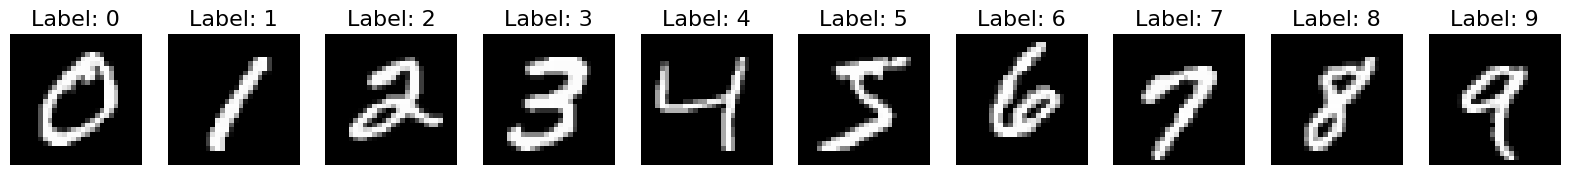

In [5]:
# Visualize some examples
num_classes = 10 # 0 .. 9
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(0, num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)
  ax[i].axis('off')

In [6]:
# Reshape the data such that we have access to every pixel of the image
# The reason to access every pixel is that only then we can apply deep learning ideas and can assign color code to every pixel.
train_data = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
train_label = y_train.astype("float32")

test_data = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
test_label = y_test.astype("float32")

In [7]:
# We know the RGB color code where different values produce various colors. It is also difficult to remember every color combination. 
# We already know that each pixel has its unique color code and also we know that it has a maximum value of 255. 
# To perform Machine Learning, it is important to convert all the values from 0 to 255 for every pixel to a range of values from 0 to 1.
train_data = train_data / 255
test_data = test_data / 255

In [8]:
# Force the amount of columns to fit the necessary sizes required by the neural network
train_label = keras.utils.to_categorical(train_label, num_classes)
test_label = keras.utils.to_categorical(test_label, num_classes)

In [9]:
# As an optional step, we decrease the training and testing data size, such that the algorithms perform their execution in acceptable time
train_data = train_data[1:num_train,]
train_label = train_label[1:num_train]

test_data = test_data[1:num_test,]
test_label = test_label[1:num_test]

In [10]:
# Display (Train) (Test) datasets
print("Reshaped Data : Dataset Trainingset")
print(train_data.shape, test_data.shape)
print("Reshaped Labels : Dataset Trainingset")
print(train_label.shape, test_label.shape)

# As we can see: We now have X images with 784 pixels in total
# We now operate on this data

Reshaped Data : Dataset Trainingset
(14999, 784) (2499, 784)
Reshaped Labels : Dataset Trainingset
(14999, 10) (2499, 10)


## Multi-layer Perceptron classifier

For more information, see: https://keras.io/guides/sequential_model/ 

In [11]:
# Create model: https://keras.io/guides/sequential_model/
model = Sequential()

# Create model layers
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Additional learning configurations
batch_size = 512
epochs=10


In [13]:
# Train model
model.fit(x=train_data, y=train_label, batch_size=batch_size, epochs=epochs)

Epoch 1/10
30/30 [==============================] - 0s 3ms/step - loss: 1.2887 - accuracy: 0.6369
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.8621
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3383 - accuracy: 0.9002
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.9148
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2412 - accuracy: 0.9342
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2092 - accuracy: 0.9406
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1900 - accuracy: 0.9467
Epoch 8/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.9503
Epoch 9/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.9567
Epoch 10/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1373 - accuracy: 0.9605


In [14]:
# Evaluate model based on supplied tags
test_loss, test_acc = model.evaluate(test_data, test_label)
print_to_txt_file("--- [%s] Running Keras-MLP Classifier ---" % datetime.now())
print_to_txt_file("\tTest Loss: %s" % test_loss)
print_to_txt_file("\tTest Accuracy: %s" % test_acc)

79/79 [==============================] - 0s 944us/step - loss: 0.2144 - accuracy: 0.9316
--- [2022-09-08 15:15:17.315701] Running Keras-MLP Classifier ---
Test Loss: 0.21444879472255707
Test Accuracy: 0.9315726161003113


In [15]:
# Let model predict data
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

print(y_pred)
print(y_pred_classes)

79/79 [==============================] - 0s 1000us/step
[[1.14073664e-04 1.37812376e-03 9.86337006e-01 ... 2.66711413e-05
  2.20942893e-03 1.87564274e-06]
 [4.61983618e-05 9.86199737e-01 2.92320596e-03 ... 2.91872653e-03
  4.25973255e-03 2.63148890e-04]
 [9.98947799e-01 8.97811390e-08 8.39424436e-04 ... 6.63608589e-05
  3.34773949e-06 7.52718915e-05]
 ...
 [6.85872521e-07 5.08033111e-07 2.57133053e-07 ... 6.43103413e-05
  4.22835071e-03 8.99416566e-01]
 [1.23434829e-05 9.08546917e-06 8.48292475e-05 ... 1.12594618e-03
  8.67342693e-04 2.87186094e-02]
 [9.78315256e-07 7.06746096e-06 6.02305408e-05 ... 8.87383139e-05
  5.33848652e-05 9.93972644e-04]]
[2 1 0 ... 9 4 4]


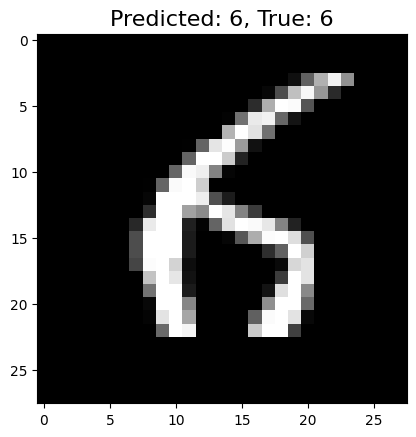

In [16]:
# View a correctly predicted datapoint
random_idx = np.random.choice(len(test_data))
x_sample = test_data[random_idx]
y_true = np.argmax(test_label, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

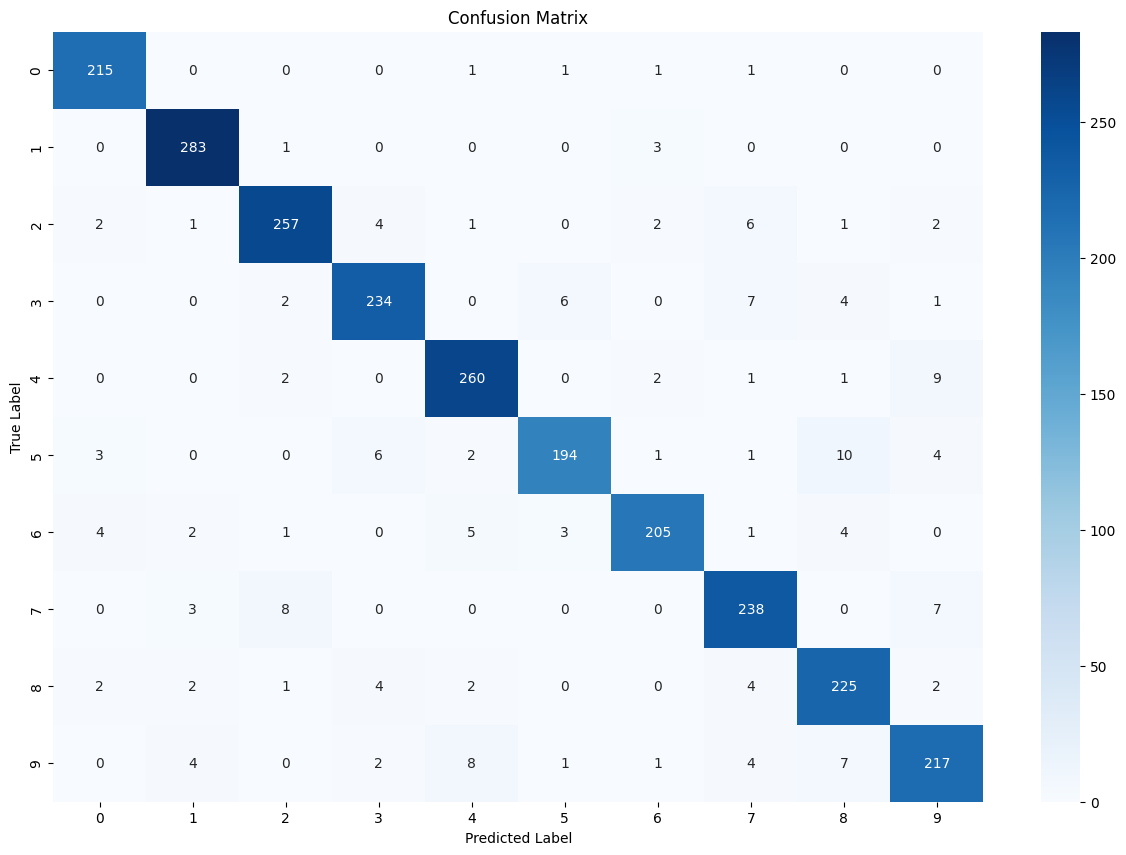

In [17]:
# Visualize estimation over correct and incorrect prediction via confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [18]:
# Review some Errors
# Create some sets of data
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = test_data[errors]

In [19]:
# Aggregate error set results
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

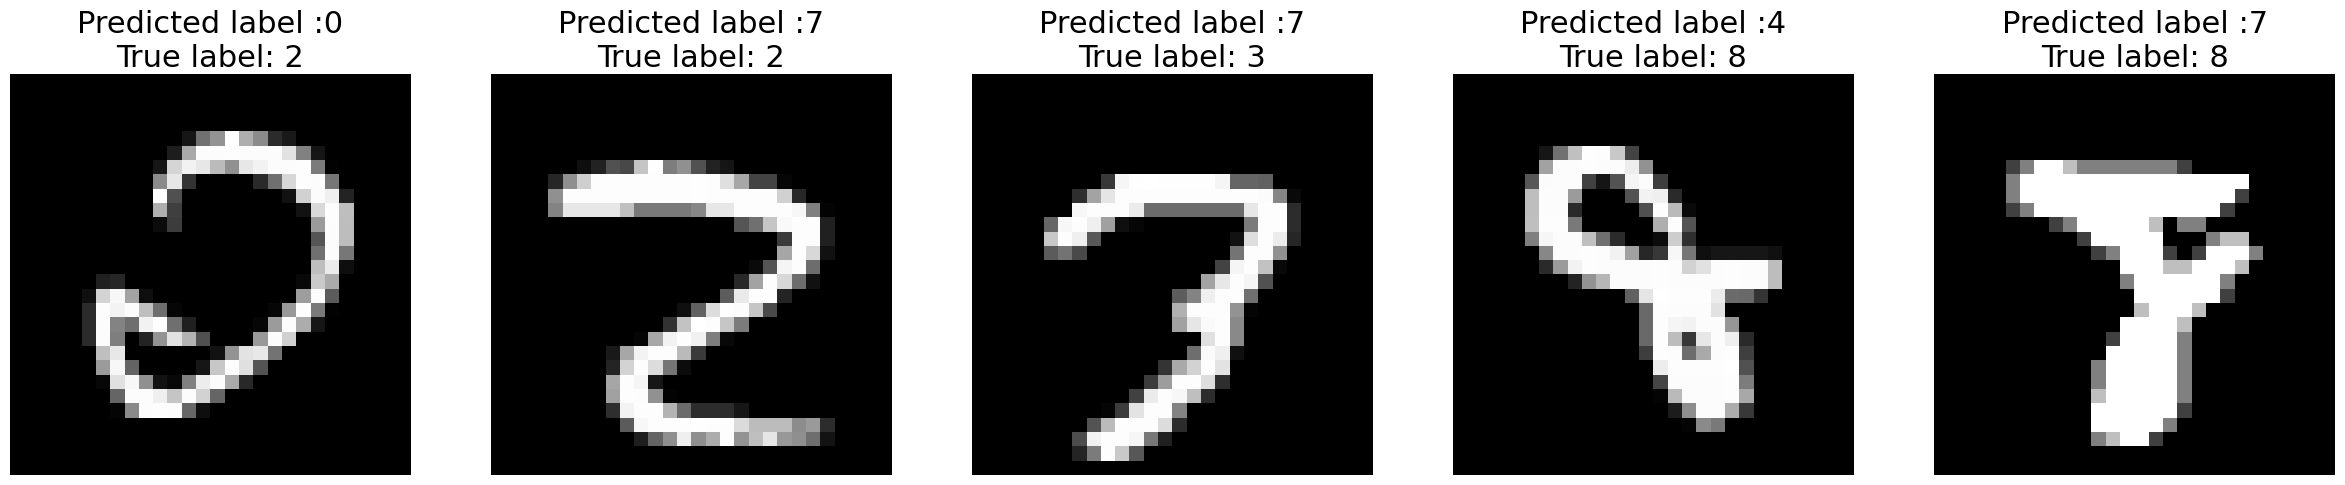

In [20]:
# Show error points which were the most failing ones
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)
  ax[i].axis('off')